### IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
from PIL import Image 
from PIL import ImageEnhance

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### UNDERSTAND DATA - EDA

### Exploratory Data Analysis
Some information about the dataset taken from the description:

There are a total of 21000 images from 15 classes
Each class contains 1400 images of size 224x224
The dataset split 70% for training, 15% for validation, and 15% for testing purpose
There are three folders:

train (15000 images)
test (3000 images)
validation (3000 images)

Image source: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [2]:
dataset = 'D:\\1_Arun_Legion\\2_Courses\AI\ML_ZoomCamp\Capstone_Proj_1\Datasets\Vegetable_Images'
train_folder = os.path.join(dataset,"train")
val_folder = os.path.join(dataset,"validation")
test_folder = os.path.join(dataset,"test")


In [3]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
            print(f"{num_files} files in {str(path.name)}")
            
count_files(os.path.join(train_folder))

1000 files in Bean
1000 files in Bitter_Gourd
1000 files in Bottle_Gourd
1000 files in Brinjal
1000 files in Broccoli
1000 files in Cabbage
1000 files in Capsicum
1000 files in Carrot
1000 files in Cauliflower
1000 files in Cucumber
1000 files in Papaya
1000 files in Potato
1000 files in Pumpkin
1000 files in Radish
1000 files in Tomato


In [4]:
vegetabels_train = os.listdir(train_folder)
vegetabels_train

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB
Image Size: (224, 224) Image Format: JPEG  Image Mode: RGB


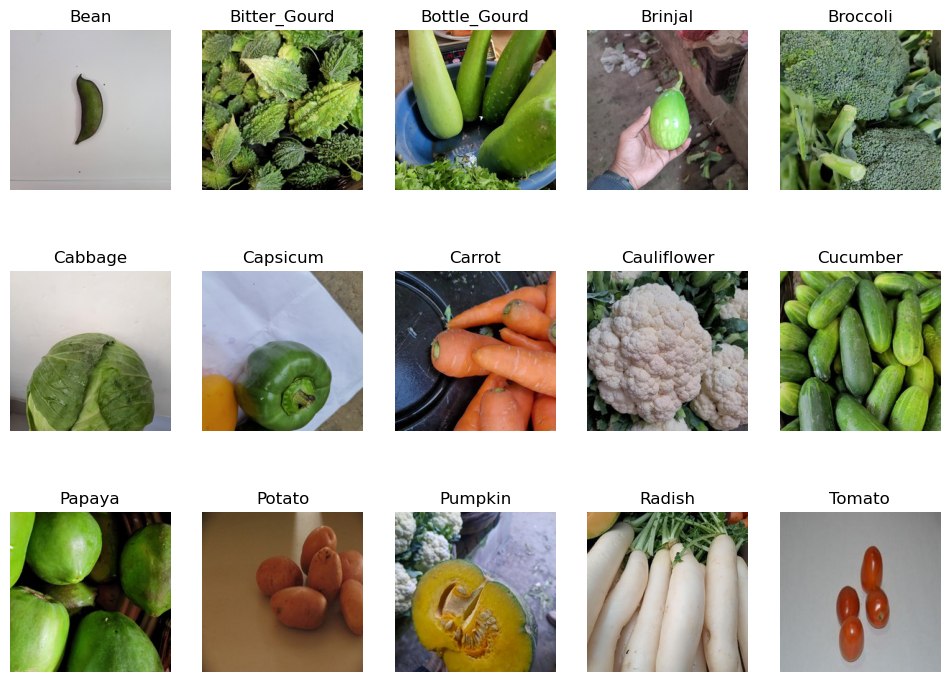

In [5]:
# Define the function to plot images from each category
def plot_images(image_categories, image_path): 
    # Create a figure and set the size
    plt.figure(figsize=(12, 12))
    
    # Loop through each category and plot the first image from each
    for i, category in enumerate(image_categories):
        # Get the path to the first image in the current category folder
        category_path = os.path.join(image_path, category)
        images_in_folder = os.listdir(category_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = os.path.join(category_path, first_image_of_folder)

        # Load the image and convert it into a NumPy array, then normalize the values
        img = image.load_img(first_image_path, target_size=(224, 224))
        img_arr = image.img_to_array(img) / 255.0
        print(f'Image Size: {img.size} Image Format: {img.format}  Image Mode: {img.mode}')
        
        # Create a subplot and plot the image with its title and no axis
        plt.subplot(4, 5, i+1) #(rows, columns, index)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()

plot_images(vegetabels_train, train_folder)

### PREPROCESS IMAGE DATA

In [6]:
# Number of vegetable classes
num_classes = 15

# Image dimensions
img_height, img_width = 224, 224

In [7]:
# Create image data generators
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1. / 255)


In [8]:
# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

Found 15000 images belonging to 15 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
    val_folder,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)


Found 3000 images belonging to 15 classes.


### Define and compile the model

In [10]:
# Define and compile the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Added
model.add(layers.MaxPooling2D((2, 2))) # Added

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) # Changed to 128
model.add(layers.Dense(num_classes, activation="softmax"))


In [11]:
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(), metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

### TRAIN THE MODEL

In [13]:
# TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10


469/469 [==============================] - 286s 609ms/step - loss: 1.0876 - accuracy: 0.6569 - val_loss: 0.5751 - val_accuracy: 0.8093
Epoch 2/10
469/469 [==============================] - 289s 616ms/step - loss: 0.4485 - accuracy: 0.8581 - val_loss: 0.4436 - val_accuracy: 0.8600
Epoch 3/10
469/469 [==============================] - 286s 610ms/step - loss: 0.2869 - accuracy: 0.9117 - val_loss: 0.2678 - val_accuracy: 0.9190
Epoch 4/10
469/469 [==============================] - 286s 610ms/step - loss: 0.2033 - accuracy: 0.9380 - val_loss: 0.2193 - val_accuracy: 0.9407
Epoch 5/10
469/469 [==============================] - 288s 613ms/step - loss: 0.1804 - accuracy: 0.9437 - val_loss: 0.1818 - val_accuracy: 0.9433
Epoch 6/10
469/469 [==============================] - 287s 613ms/step - loss: 0.1448 - accuracy: 0.9541 - val_loss: 0.2322 - val_accuracy: 0.9357
Epoch 7/10
469/469 [==============================] - 288s 613ms/step - loss: 0.1213 - accuracy: 0.9619 - val_loss: 0.2608

### CHECK LOSS AND ACCURACY (Train and Validation)

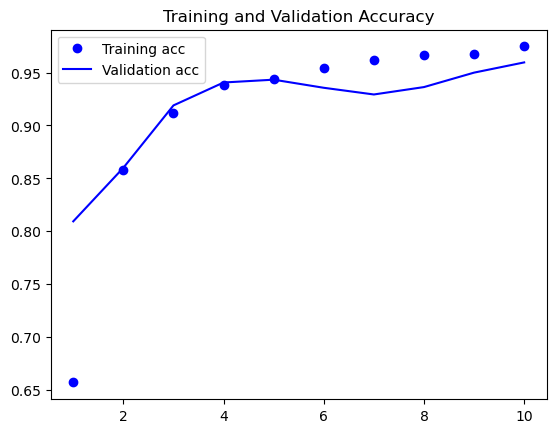

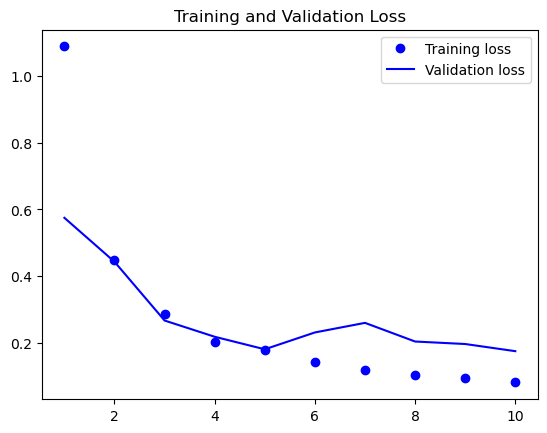

In [14]:
# PLOTTING LOSS AND ACCURACY:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Evaluate the model on the test data

In [15]:
# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Found 3000 images belonging to 15 classes.
94/94 [==============================] - 11s 114ms/step - loss: 0.1594 - accuracy: 0.9553
Test loss: 0.15939107537269592
Test accuracy: 0.9553333520889282


### SAVE THE MODEL

In [16]:
model.save('vegetable_classification_model.h5')

C:\Users\ARUN\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### TEST THE MODEL FOR RANDOM IMAGES and CHECK ACCURACY

In [17]:
def predict_op(test_img):
    # Create an ImageDataGenerator object with rescale
    datagen = ImageDataGenerator(rescale=1./255)

    x = image.img_to_array(test_img)
    x = datagen.standardize(x)
    x = np.expand_dims(x, axis=0)

    # Predict the category
    prediction = model.predict(x)[0]

    # Get the index of the most likely category
    predicted_class_index = np.argmax(prediction)

    # Get the name of the predicted class
    predicted_class = classes[predicted_class_index]

    # Print the predicted class
#     print("Predicted class:", predicted_class)
    return predicted_class

In [18]:
classes = ['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [19]:
i,j = 0,0
for image_folder in classes:  
    folder = os.path.join(test_folder,image_folder)
    img_file=random.choice(os.listdir(folder))

    test_img = image.load_img(os.path.join(folder,img_file), target_size=(224, 224))
    orig_class = classes[i]
    predicted_class = predict_op(test_img)
    print(f'Image from -> {image_folder}: {img_file}')
    print(f'Orig: {orig_class} ### Predicted:{predicted_class}')
    if (orig_class != predicted_class):
        j+=1
    i+=1
    print()

print(f'Error: {j*100/len(classes)} %')

1/1 [==============================] - 0s 73ms/step
Image from -> Bean: 0022.jpg
Orig: Bean ### Predicted:Bean

1/1 [==============================] - 0s 18ms/step
Image from -> Bitter_Gourd: 1320.jpg
Orig: Bitter_Gourd ### Predicted:Bitter_Gourd

1/1 [==============================] - 0s 20ms/step
Image from -> Bottle_Gourd: 1087.jpg
Orig: Bottle_Gourd ### Predicted:Bottle_Gourd

1/1 [==============================] - 0s 16ms/step
Image from -> Brinjal: 1185.jpg
Orig: Brinjal ### Predicted:Brinjal

1/1 [==============================] - 0s 18ms/step
Image from -> Broccoli: 1155.jpg
Orig: Broccoli ### Predicted:Broccoli

1/1 [==============================] - 0s 20ms/step
Image from -> Cabbage: 1017.jpg
Orig: Cabbage ### Predicted:Cabbage

1/1 [==============================] - 0s 26ms/step
Image from -> Capsicum: 1181.jpg
Orig: Capsicum ### Predicted:Capsicum

1/1 [==============================] - 0s 24ms/step
Image from -> Carrot: 1053.jpg
Orig: Carrot ### Predicted:Carrot

1/1 [===